In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_movies = pd.read_csv("../Labb/Big/movies.csv")
df_ratings = pd.read_csv("../Labb/Big/ratings.csv")

# 1.1 Movielens full - EDA

# A

In [11]:
# EDA
df_movies.info(), df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


(None, None)

In [12]:
df_movies.describe()

,movieId
count,58098.000000
mean,111919.516197
std,59862.660956
min,1.000000
25%,72437.750000
50%,126549.000000
75%,161449.500000
max,193886.000000


In [13]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,1.193122e+09
std,8.170740e+04,3.510263e+04,1.066353e+00,2.160482e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,7.117600e+04,1.097000e+03,3.000000e+00,9.986053e+08
50%,1.420220e+05,2.716000e+03,3.500000e+00,1.174256e+09
75%,2.124590e+05,7.150000e+03,4.000000e+00,1.422744e+09
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09


In [14]:
df_ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [15]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [2]:
# Do some EDA

# Merge the two dataframes

df = pd.merge(df_movies, df_ratings, on='movieId')

#df[df['title'] == "Jumanji (1995)"]

<Axes: xlabel='rating'>

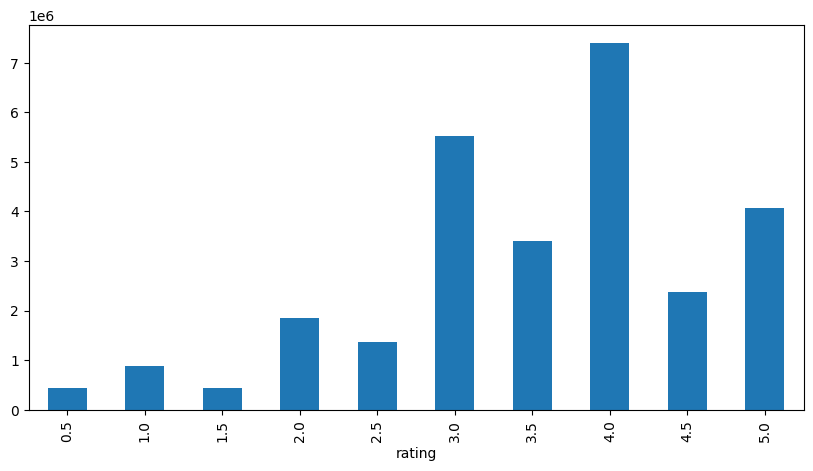

In [17]:
df.groupby('rating')['userId'].count().plot(kind='bar', figsize=(10, 5))

# B

Text(0.5, 1.0, 'Top 10 movies by number of ratings')

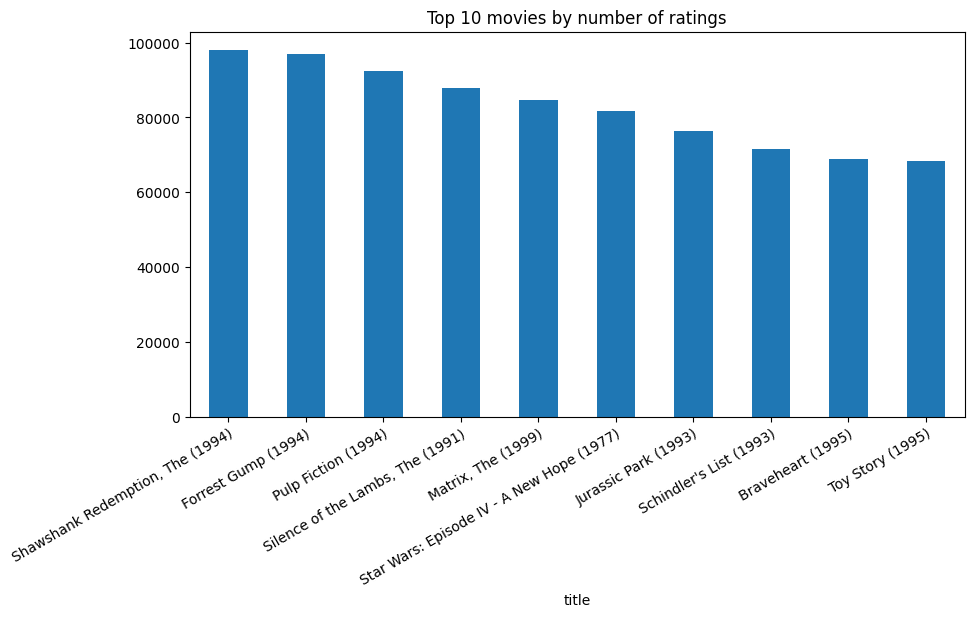

In [18]:
# sort movies by number of ratings

df.groupby('title')['userId'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30, rotation_mode="anchor", ha="right");
plt.title('Top 10 movies by number of ratings')


In [19]:
top_rated_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

## C

In [20]:
# loop through list of top rated movies and plot the average ratings for each movie

for movie in top_rated_movies.index:
    average_rating = df[df['title'] == movie]['rating'].mean()
    print(f"{movie}: {average_rating:.2f}")


Shawshank Redemption, The (1994): 4.42
Forrest Gump (1994): 4.06
Pulp Fiction (1994): 4.17
Silence of the Lambs, The (1991): 4.15
Matrix, The (1999): 4.15
Star Wars: Episode IV - A New Hope (1977): 4.12
Jurassic Park (1993): 3.67
Schindler's List (1993): 4.26
Braveheart (1995): 4.01
Toy Story (1995): 3.89


## D

In [4]:
# creates new column with year of release
# extract the year from the title column using regex
# \( = start of expression
# (\d{4}) = 4 digits next to each other
# \) = end of expression
# $ all of the above must occur at the end of the string
# Source: https://stackoverflow.com/questions/64323346/extracting-year-from-a-column-of-string-movie-names
df["year"] = df["title"].str.extract(r"\((\d{4})\)$", expand=False)
df["year"] = pd.to_numeric(df["year"])

In [5]:
df['year'] = df['year'].fillna(0).astype(int) # converts from float to int

In [6]:
# finds all years between 1 and 2020 ()

df_years = df[(df['year'] > 1) & (df['year'] < 2022)] # removes all movies with year 0


In [21]:
df_years['year'].min(), df_years['year'].max()

(1902, 2018)

Text(0.5, 1.0, 'Number of movies released each year')

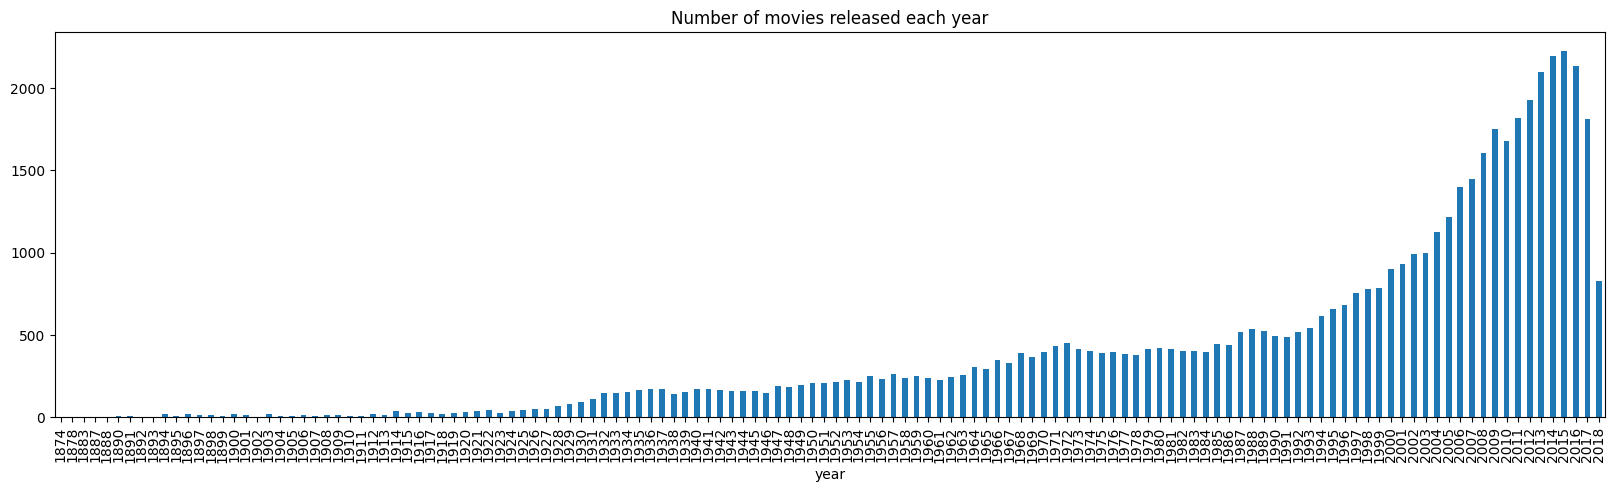

In [25]:
# plot the number of movies released each year

df_years.groupby('year')['title'].nunique().plot(kind='bar', figsize=(20, 5))
plt.title('Number of movies released each year')

C:\Users\Danne\AppData\Local\Temp\ipykernel_25936\3525288606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years['decade'] = df_years['year'] // 10 * 10 #


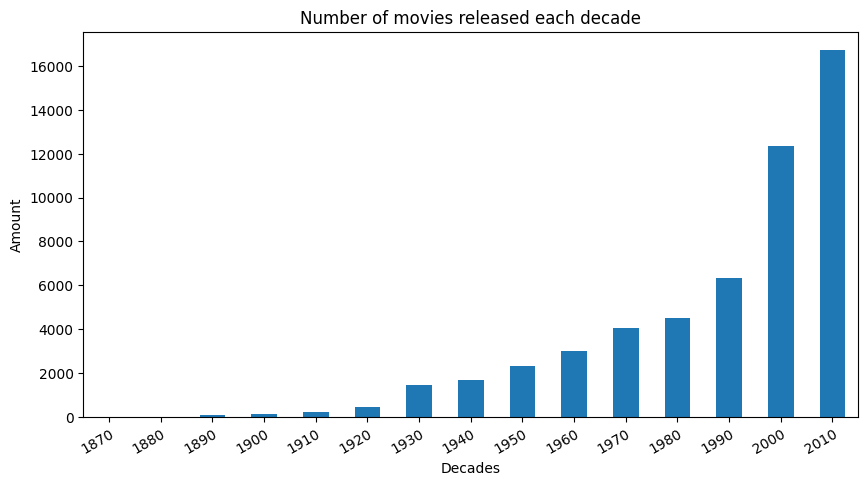

In [26]:
# groups up years in to decades which makes it easier to read the graph

df_years['decade'] = df_years['year'] // 10 * 10 # 

# change x-axis to show decades instead of years
df_years.groupby('decade')['title'].nunique().plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30, rotation_mode="anchor", ha="right");
plt.xlabel('Decades')
plt.ylabel('Amount')
plt.title('Number of movies released each decade');

## E

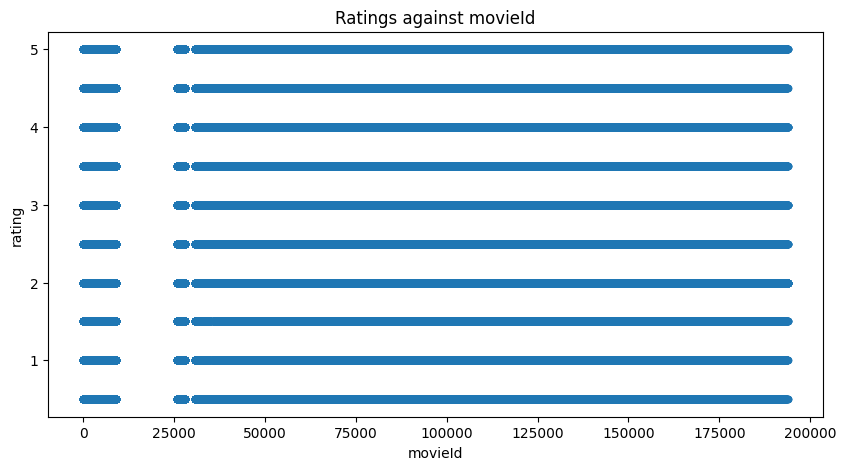

In [27]:
# not sure that this is correct, does not seem to make too much sense

df.plot(x='movieId', y='rating', kind='scatter', figsize=(10, 5))
plt.title('Ratings against movieId');

In [28]:
len(df['movieId'].unique())

53889

In [29]:
len(df['rating'])

27753444

## F

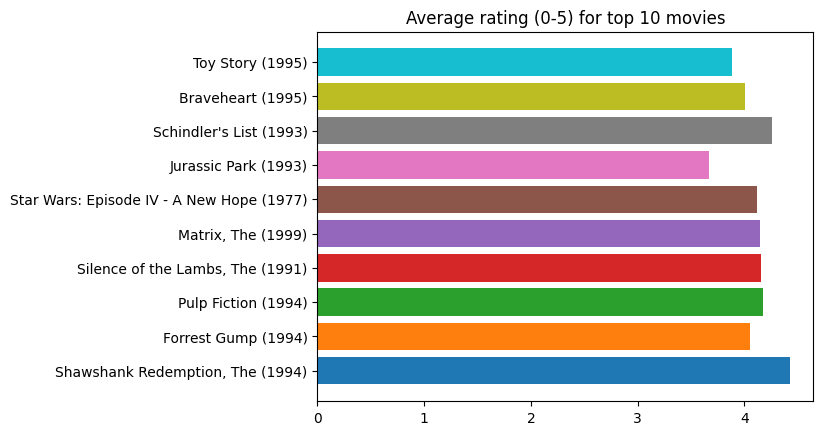

In [30]:
for movie in top_rated_movies.index:
    average_rating = df[df['title'] == movie]['rating'].mean()
    plt.barh(movie, average_rating)
    plt.title('Average rating (0-5) for top 10 movies')

# 1.2 Create a sparse matrix

- Removes certain genres I'm not interested in
- Most movies that has a score below 3.5 are very hit or miss, while movies that I watch that are 4 or greater are almost always pretty good
- removed movies with less than 1000 ratings because it will also be very hit or miss whether the rating is accurate or not.
- removes all data that has the year '0'
- removes all movies with an average score below 3.5

In [49]:
df_movies = pd.read_csv("../Labb/Big/movies.csv")
df_ratings = pd.read_csv("../Labb/Big/ratings.csv")


df = pd.merge(df_movies, df_ratings, on='movieId')

df["year"] = df["title"].str.extract(r"\((\d{4})\)$", expand=False)
df["year"] = pd.to_numeric(df["year"])
df['year'] = df['year'].fillna(0).astype(int) # converts from float to int
df_years = df[(df['year'] > 1) & (df['year'] < 2022)]

In [50]:
# filter out data in order lessen the computational load for the next step (sparse matrix)
# remove all movies that have less than 100 ratings & are below a rating of 3.5
# remove all movies that are childrens movies
# remove all movies that has the year 0

#df = df[df['rating'] > 3.5] # removes all movies with rating below 3.5 # removes all childrens movies
 # removes all movies with year 0
# found this little lambda function here: https://stackoverflow.com/questions/70842799/how-to-drop-moviesrows-that-have-less-than-5-reviews-pandas

# might add more filters here, sofar half of dataset filtered out

In [66]:
# for loop that removes certain genres from the dataset
genrelist = ["Children", "Comedy", "Romance", "Sci-Fi", "Musical", "Documentary", "Western"]
for genre in genrelist:
    df = df[df['genres'].str.contains(genre) == False]

df = df[df['year'] != 0] # removes all movies with year 0

In [64]:
# Creates two new columns that include the average rating and number of ratings for each movie
# SJUKT ANVÄNDBART
df['average_rating'] = df.groupby('movieId')['rating'].transform('mean');
df['number_of_ratings'] = df.groupby('movieId')['rating'].transform('count');
df.reset_index(drop=True, inplace=True)

C:\Users\Danne\AppData\Local\Temp\ipykernel_21788\2603656450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_rating'] = df.groupby('movieId')['rating'].transform('mean');
C:\Users\Danne\AppData\Local\Temp\ipykernel_21788\2603656450.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_ratings'] = df.groupby('movieId')['rating'].transform('count');


In [68]:
df = df[df['average_rating'] > 3.5]
df = df[df['number_of_ratings'] > 1000]

In [70]:
len(df['title'].unique()) # 816 unique movie titles left in dataset, which is not too much and not too little

816

In [72]:
# Converting timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], unit = "s")
df

,movieId,title,genres,userId,rating,timestamp,year,average_rating,number_of_ratings
0,6,Heat (1995),Action|Crime|Thriller,4,4.5,2005-04-17 19:47:22,1995,3.844211,28683
1,6,Heat (1995),Action|Crime|Thriller,18,3.0,1996-10-11 19:22:18,1995,3.844211,28683
2,6,Heat (1995),Action|Crime|Thriller,19,4.0,1996-07-03 22:45:32,1995,3.844211,28683
3,6,Heat (1995),Action|Crime|Thriller,39,3.0,2004-02-21 03:35:39,1995,3.844211,28683
4,6,Heat (1995),Action|Crime|Thriller,51,3.0,1999-03-22 11:59:57,1995,3.844211,28683
...,...,...,...,...,...,...,...,...,...
6774223,180031,The Shape of Water (2017),Adventure|Drama|Fantasy,282374,4.0,2018-03-16 23:15:15,2017,3.599457,1473
6774224,180031,The Shape of Water (2017),Adventure|Drama|Fantasy,282405,3.5,2018-02-26 23:19:21,2017,3.599457,1473
6774225,180031,The Shape of Water (2017),Adventure|Drama|Fantasy,282670,2.5,2018-06-02 14:35:18,2017,3.599457,1473
6774226,180031,The Shape of Water (2017),Adventure|Drama|Fantasy,283000,3.5,2018-02-09 01:59:08,2017,3.599457,1473


In [73]:
# create sparse matrix using scipy.sparse.csc_matrix()

from scipy.sparse import csc_matrix

# create a pivot table with movieId as index, userId as columns and ratings as values

pivot_table = df.pivot_table(index='movieId', columns='userId', values='rating')

816